# Connect Big Query

In [1]:
# libraries that we need
from google.cloud import bigquery
from google.colab import auth

# authenticate
auth.authenticate_user()

# initialize the client for BigQuery
project_id = 'employee-churn-analysis-448210'
client = bigquery.Client(project = project_id, location = 'US')

In [2]:
# get the dataset and table
dataset_ref = client.dataset(dataset_id = 'employee_data', project = project_id)
dataset = client.get_dataset(dataset_ref)

table_ref = dataset.table('tbl_hr_data')
table = client.get_table(table_ref)
table.schema

[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

In [3]:
new_table_ref = dataset.table('tbl_new_employees')
new_table = client.get_table(new_table_ref)
new_table.schema

[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

In [4]:
# convert to dataframe
df = client.list_rows(table = table).to_dataframe()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.36,0.56,2,132,3,0,1,0,IT,medium,EMP00064
1,0.74,0.99,2,277,3,0,1,0,IT,medium,EMP00071
2,0.45,0.53,2,155,3,0,1,0,IT,low,EMP00142
3,0.40,0.53,2,151,3,0,1,0,IT,low,EMP00215
4,0.36,0.51,2,155,3,0,1,0,IT,low,EMP00216


In [5]:
df_new = client.list_rows(table = new_table).to_dataframe()
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.331690,0.847953,6,151,4,0,0,0,IT,low,NE15014
1,0.468434,0.169659,5,303,4,0,0,0,IT,low,NE15015
2,0.858448,0.918311,4,162,6,1,0,0,IT,low,NE15064
3,0.056211,0.322600,2,229,5,1,0,0,IT,low,NE15086
4,0.382648,0.434348,4,260,3,1,0,0,hr,low,NE15021


# Build Model

### Install PyCaret

In [7]:
!pip install pycaret

### Code and Build Model

In [10]:
# get the model
from pycaret.classification import *

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         14999 non-null  Int64  
 3   average_montly_hours   15004 non-null  Int64  
 4   time_spend_company     14999 non-null  Int64  
 5   Work_accident          15000 non-null  Int64  
 6   Quit_the_Company       15004 non-null  Int64  
 7   promotion_last_5years  15004 non-null  Int64  
 8   Departments            15004 non-null  object 
 9   salary                 15004 non-null  object 
 10  employee_id            15004 non-null  object 
dtypes: Int64(6), float64(2), object(3)
memory usage: 1.3+ MB


In [12]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'Quit_the_Company', 'promotion_last_5years', 'Departments', 'salary',
       'employee_id'],
      dtype='object')

In [13]:
# set up model
setup(df, target = 'Quit_the_Company', session_id = 100, ignore_features = ['employee_id'], categorical_features = ['salary', 'Departments'])

,Description,Value
0,Session id,100
1,Target,Quit_the_Company
2,Target type,Binary
3,Original data shape,"(15004, 11)"
4,Transformed data shape,"(15004, 21)"
5,Transformed train set shape,"(10502, 21)"
6,Transformed test set shape,"(4502, 21)"
7,Ignore features,1
8,Numeric features,7
9,Categorical features,2


In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9895,0.9912,0.9624,0.9934,0.9776,0.9708,0.9711,1.0240
lightgbm,Light Gradient Boosting Machine,0.9866,0.9927,0.9568,0.9864,0.9714,0.9626,0.9628,1.4090
xgboost,Extreme Gradient Boosting,0.9859,0.9920,0.9600,0.9804,0.9701,0.9609,0.9610,0.2360
et,Extra Trees Classifier,0.9851,0.9909,0.9549,0.9824,0.9684,0.9587,0.9589,1.1150
gbc,Gradient Boosting Classifier,0.9766,0.9874,0.9285,0.9721,0.9497,0.9344,0.9349,1.1710
dt,Decision Tree Classifier,0.9747,0.9706,0.9628,0.9333,0.9477,0.9310,0.9313,0.1230
ada,Ada Boost Classifier,0.9584,0.9820,0.9085,0.9164,0.9124,0.8851,0.8852,0.3800
knn,K Neighbors Classifier,0.9338,0.9668,0.9161,0.8258,0.8684,0.8244,0.8265,0.2670
qda,Quadratic Discriminant Analysis,0.8558,0.9027,0.8082,0.6665,0.7282,0.6318,0.6392,0.1130
lr,Logistic Regression,0.7876,0.8203,0.3332,0.5974,0.4274,0.3098,0.3299,1.1060


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

In [15]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9914,0.9940,0.9641,1.0000,0.9817,0.9762,0.9764
1,0.9933,0.9886,0.9761,0.9959,0.9859,0.9816,0.9816
2,0.9895,0.9942,0.9681,0.9878,0.9779,0.9710,0.9711
3,0.9933,0.9963,0.9720,1.0000,0.9858,0.9814,0.9816
4,0.9857,0.9878,0.9480,0.9916,0.9693,0.9600,0.9604
5,0.9914,0.9944,0.9720,0.9918,0.9818,0.9762,0.9763
6,0.9876,0.9860,0.9560,0.9917,0.9735,0.9654,0.9657
7,0.9857,0.9877,0.9400,1.0000,0.9691,0.9598,0.9606
8,0.9914,0.9929,0.9720,0.9918,0.9818,0.9762,0.9763


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
final_df = predict_model(rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9884,0.9938,0.9590,0.9923,0.9754,0.9678,0.9681


In [17]:
final_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,Quit_the_Company,prediction_label,prediction_score
13660,0.74,0.98,3,166,3,1,1,management,high,0,0,1.00
3355,0.73,0.67,2,139,8,0,0,sales,medium,0,0,1.00
9818,0.58,0.70,5,151,4,0,0,marketing,medium,0,0,0.99
11805,0.77,1.00,4,232,5,0,0,technical,medium,1,1,1.00
10274,0.43,0.52,2,160,3,0,0,technical,low,1,1,1.00


In [19]:
new_pred = predict_model(rf_model, data = df_new)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9400,0,0.0000,0.0000,0.0000,0.0000,0.0000


In [21]:
new_pred.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,employee_id,Quit_the_Company,prediction_label,prediction_score
0,0.331690,0.847953,6,151,4,0,0,IT,low,NE15014,0,0,0.76
1,0.468434,0.169659,5,303,4,0,0,IT,low,NE15015,0,1,0.53
2,0.858448,0.918311,4,162,6,1,0,IT,low,NE15064,0,0,0.86
3,0.056211,0.322600,2,229,5,1,0,IT,low,NE15086,0,0,0.64
4,0.382648,0.434348,4,260,3,1,0,hr,low,NE15021,0,0,0.94


In [22]:
new_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     100 non-null    float32 
 1   last_evaluation        100 non-null    float32 
 2   number_project         100 non-null    Int64   
 3   average_montly_hours   100 non-null    Int64   
 4   time_spend_company     100 non-null    Int64   
 5   Work_accident          100 non-null    Int64   
 6   promotion_last_5years  100 non-null    Int64   
 7   Departments            100 non-null    category
 8   salary                 100 non-null    category
 9   employee_id            100 non-null    category
 10  Quit_the_Company       100 non-null    Int64   
 11  prediction_label       100 non-null    int64   
 12  prediction_score       100 non-null    float64 
dtypes: Int64(6), category(3), float32(2), float64(1), int64(1)
memory usage: 13.4 KB


In [23]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(new_pred['Quit_the_Company'], new_pred['prediction_label']))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       100
         1.0       0.00      0.00      0.00         0

    accuracy                           0.94       100
   macro avg       0.50      0.47      0.48       100
weighted avg       1.00      0.94      0.97       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
# write back to BigQuery

new_pred.to_gbq('employee_data.tbl_predictions', project_id, chunksize = None, if_exists = 'replace')

100%|██████████| 1/1 [00:00<00:00, 6034.97it/s]


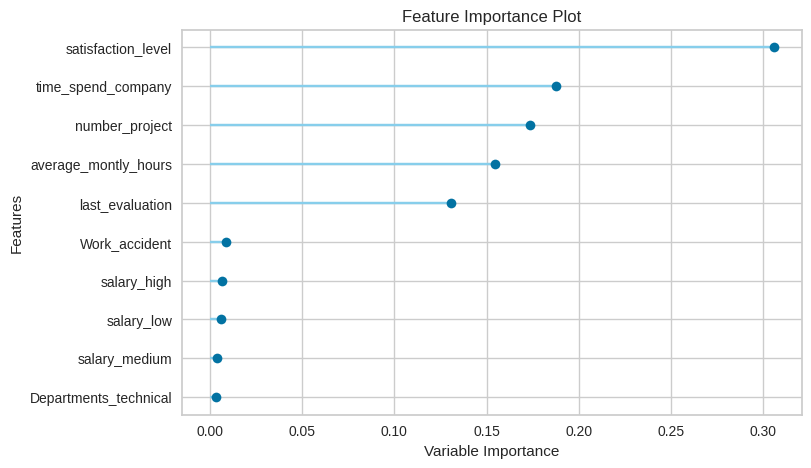

In [29]:
plot_model(rf_model, plot = 'feature')

In [30]:
# create a feature table
rf_model.feature_names_in_

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments_technical',
       'Departments_support', 'Departments_sales',
       'Departments_marketing', 'Departments_IT',
       'Departments_accounting', 'Departments_management',
       'Departments_product_mng', 'Departments_hr', 'Departments_RandD',
       'salary_low', 'salary_medium', 'salary_high'], dtype=object)

In [31]:
rf_model.feature_importances_

array([0.3058203 , 0.13091701, 0.17365229, 0.15455279, 0.18754905,
       0.0085308 , 0.00173044, 0.00343356, 0.00310614, 0.00337408,
       0.00112642, 0.00199366, 0.00187198, 0.0018733 , 0.00111174,
       0.00167525, 0.00168315, 0.00606842, 0.00363544, 0.00629421])

In [32]:
import pandas as pd
feature_table = pd.DataFrame(zip(rf_model.feature_names_in_, rf_model.feature_importances_),
                             columns = ['feature', 'importance'])
feature_table

,feature,importance
0,satisfaction_level,0.305820
1,last_evaluation,0.130917
2,number_project,0.173652
3,average_montly_hours,0.154553
4,time_spend_company,0.187549
5,Work_accident,0.008531
6,promotion_last_5years,0.001730
7,Departments_technical,0.003434
8,Departments_support,0.003106
9,Departments_sales,0.003374


In [33]:
feature_table.to_gbq('employee_data.feature_table', project_id, chunksize = None, if_exists = 'replace')

100%|██████████| 1/1 [00:00<00:00, 1559.22it/s]
